In [2]:
from IPython.display import Image

# Introduction 

## What are the Panama papers?

Panama papers are the leak of 11.5 millions documents. They describe details of evasion tax from the 1970s to 2015. For this project, we have access to the database of https://www.occrp.org/en/panamapapers/database. It contains four files describing different leaks of evasion tax: Panama papers, Bahamas leaks, Offshore leaks and Paradise papers. The goal of this project is to compile these four files to create an homogeneous database and extract relevant information. We focus on five research questions to show how evasion tax evolves over time and how significant this problem is.

## Definition of important terms

Before going into the details, we start by defining important terms which will be used in this project.

### Entity

An entity is an offshore company located in a country with low-tax. The goal of this company is to attract non-resident clients which send them their money. The idea is to reduce significantly the amount of tax paid by the clients.

### Officer

An officer is the client of an entity, it can be a person or a company.

### Intermediary

An intemediary is a middle person or company between an officer and an entity. It gets the money from the officer and signs the contract with the entity. The goal is the hide the officer from the contract.

### Nodes and edges

This database can be represented as a graph. It contains nodes which are connected using edges. In this project, a node can be an officer, an intermediary or entity. It contains a country, a juridsiction and a creation date. An edge is a relation between two nodes, it contains a creation date and a deletion date.

# Relevant statistics about Panama papers

The database contains **1'906'686 nodes** and **3'142'523 edges**.

The node that has the most **outgoing edges** has **36373** outgoing edges and the node that has the most **incoming edges** has **37338** outgoing edges.

**29.55%** of edges have a **start date** and among those, **22.32%** have an **end date**. They range from **1960-03-10** to **2015-12-31**.

The entities creation dates range from **1960-01-01** to **2015-12-31**.

**Malta** is the country and the jurisdiction with the most outgoing edges, with respectively **410'663** and **83'943** outgoing edges.

**British Virgin Islands** is the country and the jurisdiction with the most incoming edges, with respectively **59'381** and **565'292** outgoing edges.

In the chart below we can see the nodes distribution. What stands out is that there is a very small number of intermediaries compared to the number of entitites and officier.

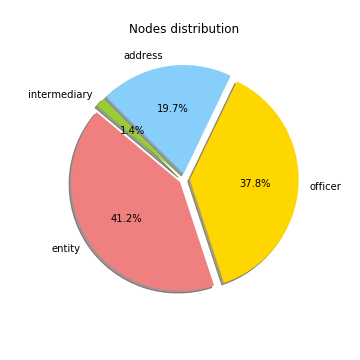

In [55]:
Image(filename='Plots/0.png')

## Which countries contribute the most to tax evasion?

A first great way to get insight into the data is to plot on a map the biggest contributors to the data we have.

This is done on the following map : <div> <a href="biggest.html">Top 10 countries</a> </div>

The map displays the 10 countries with the most outgoing connections.

It is interactive : to see a specific country, click the button on the top right corner.

As we can see from the map above, some of these countries have already jurisdictions with a low tax rate. This can be explained by the fact that many multinationals have their headquarters in tax havens.

# What is our Goal in this Project? (Research Questions)

From the beginning of the project, we have some specific research questions we want to find answers to.

We start by analyzing the evolution of the number number of offshore societies over time.

We then try to see if people are the sole owners of their offshore societies or if they share this ownership with others.

Next we investigate to how many offshore societies people are connected to.

Afterwards we examine if people sign their own contract with offshore societies or if they do it through an intermediary.

And lastly we look for a correlation between location of the offshore societies and location of their owners.

## I) How does the number of offshore societies evolve over time?

One of the most interesting insights we can get from the Panama Papers data is how the offshore societies evolve over time. In other words, when were most these offshore societies created or deleted?

We start by plotting the number of offshore societies creations per month (left plot) and per year (right plot).

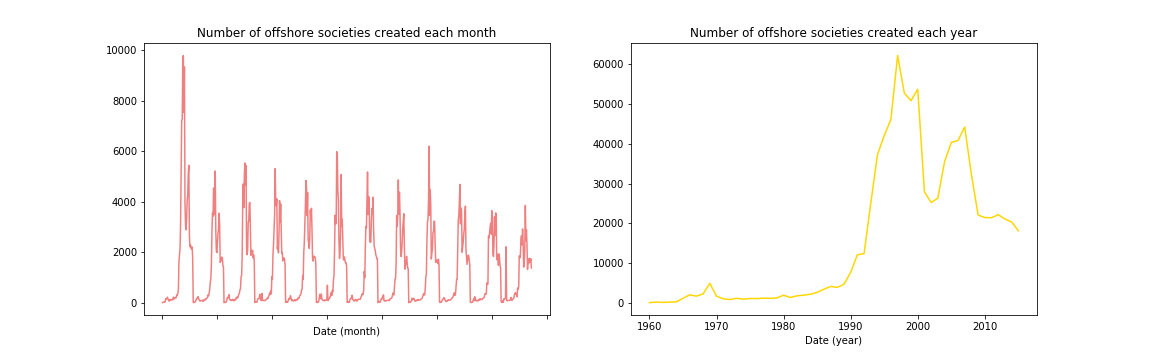

In [29]:
Image(filename='Plots/1-1.png')

On the left plot we can see that there are peaks in the creations of entities either in january or december.

On the right plot, we can see a peak in the number of creations of offshore societies between year 1995 and 2000. This corresponds to the internet bubble.

Now we can plot the number of connections established (left) and ended (right) each year.

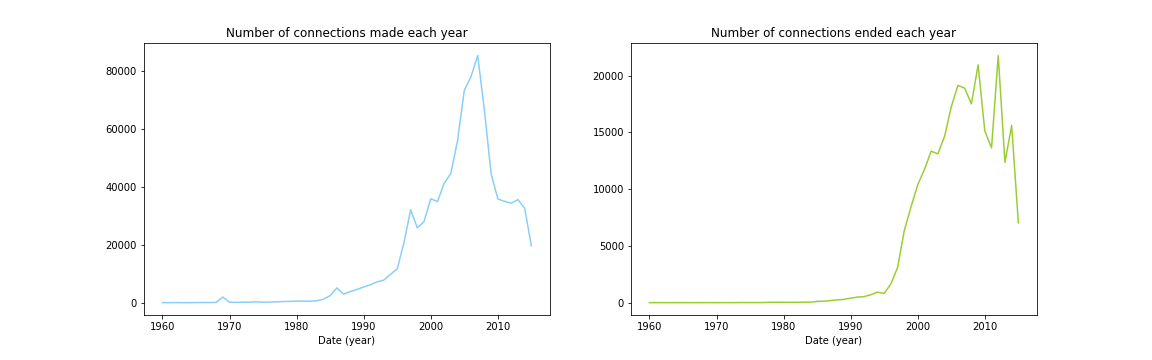

In [30]:
Image(filename='Plots/1-2.png')

From the plots above, we can see a peak in the creation of offshore societies and connections established in 2008 and 2009.

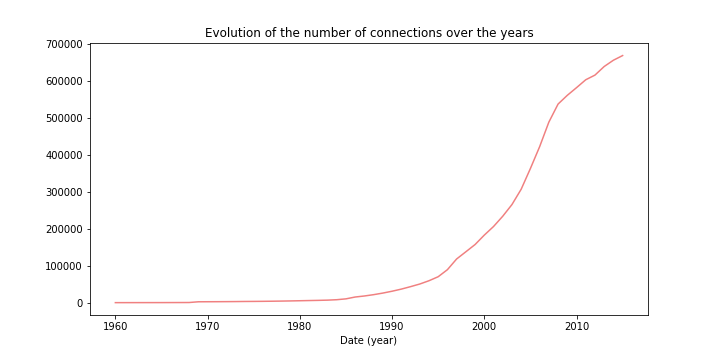

In [32]:
Image(filename='Plots/1-3.png')

We observe a an exponential increase in the number of offshore societies in 2000.

## II) Do people share ownership of their offshore society?

It is interesting to investigate whether people are the sole owners of their offshore society or if they share the ownership with others.

Let's first plot the distribution of offshore societies ownership :

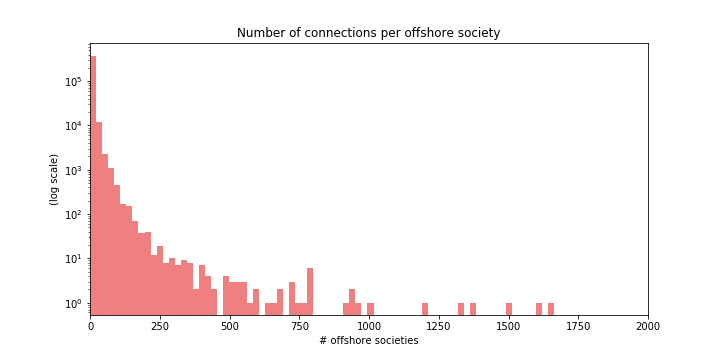

In [41]:
Image(filename='Plots/3-1.png')

We can see that most of the offshore societies have only one owner. And and the number of connections per offshore society decreases in an exponential fashion.

Let's look at this from an other angle. We can divide these values in four categories depending on the number of connections per offshore society.
1. Societies that have 1 connection
2. Societies that have 2 to 4 connections
3. Societies that have 5 to 9 connections
4. Societies that have 10 or more connections

These same 4 categories will be used throughout this data story.

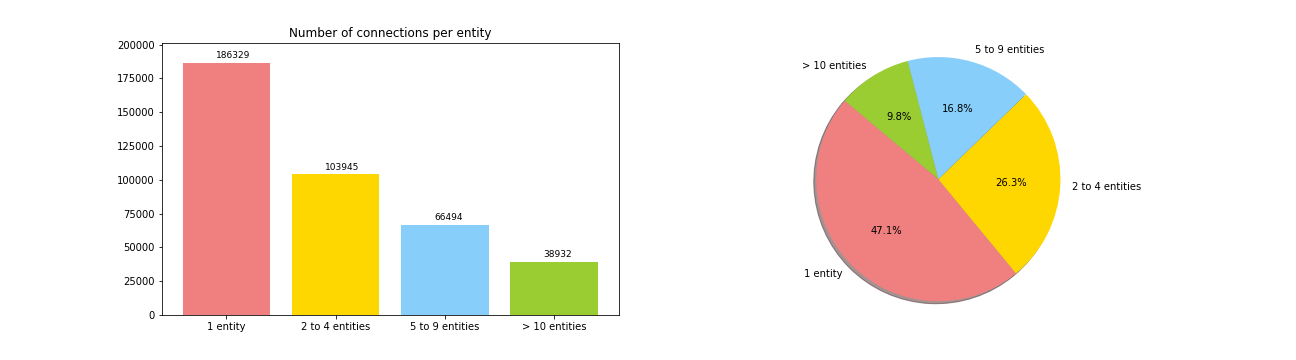

In [36]:
Image(filename='Plots/3-2.png')

## III) To how many offshore societies are people connected to?

Now we are interested in knowing how likely it is for someone that is already connected to an offshore society to be connected to more than one of these offshore societies.

The number of offshore societies per owner can be simply plotted as follows :

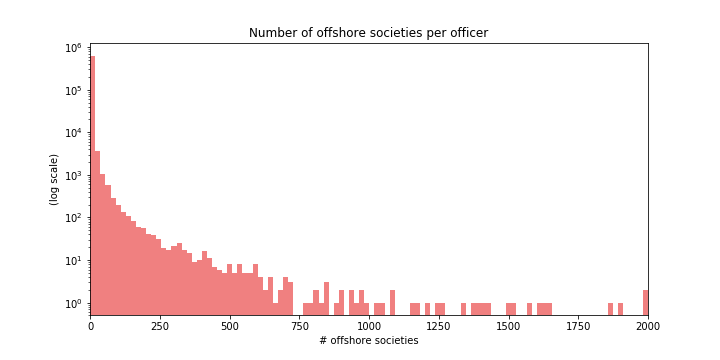

In [38]:
Image(filename='Plots/2-1.png')

We can again divide into the same categories as above to view the data from an other angle. As the great majority of people are connected to only one entity, we add a third plot to focus on people connected to more than one entity.

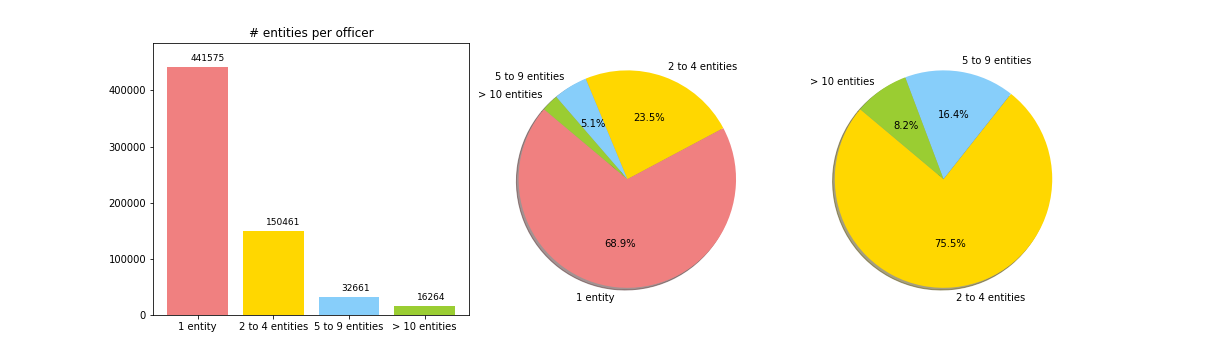

In [26]:
Image(filename='Plots/2-2.png')

## IV) Do people sign their own contract with an offshore society or do they use an intermediary?

Ut velit mauris, egestas sed, gravida nec, ornare ut, mi. Aenean ut orci vel massa suscipit pulvinar. Nulla sollicitudin. Fusce varius, ligula non tempus aliquam, nunc turpis ullamcorper nibh, in tempus sapien eros vitae ligula. Pellentesque rhoncus nunc et augue. Integer id felis. Curabitur aliquet pellentesque diam. Integer quis metus vitae elit lobortis egestas. Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Morbi vel erat non mauris convallis vehicula. Nulla et sapien. Integer tortor tellus, aliquam faucibus, convallis id, congue eu, quam. Mauris ullamcorper felis vitae erat. Proin feugiat, augue non elementum posuere, metus purus iaculis lectus, et tristique ligula justo vitae magna.
Aliquam convallis sollicitudin purus. Praesent aliquam, enim at fermentum mollis, ligula massa adipiscing nisl, ac euismod nibh nisl eu lectus. Fusce vulputate sem at sapien. Vivamus leo. Aliquam euismod libero eu enim. Nulla nec felis sed leo placerat imperdiet. Aenean suscipit nulla in justo. Suspendisse cursus rutrum augue. Nulla tincidunt tincidunt mi. Curabitur iaculis, lorem vel rhoncus faucibus, felis magna fermentum augue, et ultricies lacus lorem varius purus. Curabitur eu amet.

## V) Correlation between the location of the people and the location of their offshore society?

We are now interested in knowing if there exists a correlation between the location of the people and the location of their offshore society.

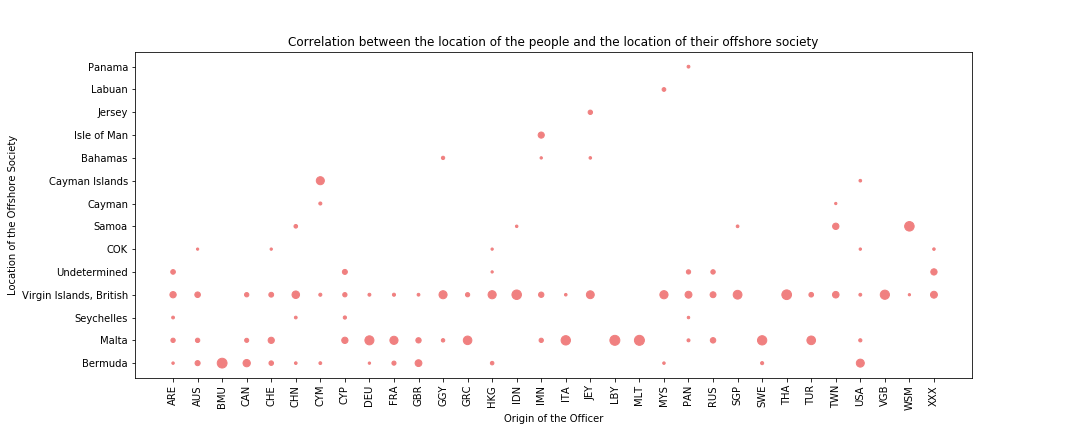

In [57]:
Image(filename='Plots/5-1.png')

# Conclusion

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed non risus. Suspendisse lectus tortor, dignissim sit amet, adipiscing nec, ultricies sed, dolor. Cras elementum ultrices diam. Maecenas ligula massa, varius a, semper congue, euismod non, mi. Proin porttitor, orci nec nonummy molestie, enim est eleifend mi, non fermentum diam nisl sit amet erat. Duis semper. Duis arcu massa, scelerisque vitae, consequat in, pretium a, enim. Pellentesque congue. Ut in risus volutpat libero pharetra tempor. Cras vestibulum bibendum augue. Praesent egestas leo in pede. Praesent blandit odio eu enim. Pellentesque sed dui ut augue blandit sodales. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Aliquam nibh. Mauris ac mauris sed pede pellentesque fermentum. Maecenas adipiscing ante non diam sodales hendrerit.